<a href="https://colab.research.google.com/github/KostyaKrechetov/Data-analysis-course-ITMO/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade scipy

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.2)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data from csv file - Spotify Dataset

path_to_file = '/content/data.csv'
df = pd.read_csv(path_to_file, engine='python')

df.sample(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
144825,0.9920,['Agathoklis Mouskas'],0.493,277067,0.509,0,1McuEVfSd8fSR1sjaHxkNP,0.2100,7,0.168,-12.578,1,Kaimene Thano,0,1950-01-01,0.0790,111.216,0.623,1950
45310,0.6030,"['Art Farmer', 'Gigi Gryce']",0.481,260240,0.462,0,414lL3atTJhpYaG3ZJh3Bd,0.2840,7,0.299,-10.549,0,Deltitnu,13,1955,0.0477,153.746,0.672,1955
63005,0.9850,"['Wolfgang Amadeus Mozart', 'Isaac Stern', 'Pa...",0.405,390867,0.208,0,0LzGmom0nRp3dmjUsUqxY5,0.8160,3,0.163,-15.064,1,"Sinfonia concertante in E-Flat Major, K. 364: ...",0,1952,0.0381,77.087,0.473,1952
39790,0.9960,['Francisco Canaro'],0.668,155000,0.392,0,5LOJVpLxaxAdHm30shsMm6,0.9310,2,0.153,-13.280,1,Catalina - Instrumental (Remasterizado),0,1927-08-20,0.1110,202.366,0.929,1927
68637,0.0175,['Motörhead'],0.404,215573,0.966,0,4i2F35b5tamKhvMsf0wuuL,0.0111,6,0.311,-5.038,1,Live to Win,40,1980-11-08,0.0613,102.512,0.538,1980


Trimming tail/outliers for 'duration_ms'.

In [4]:
def trim_duration(data, procentile):
    data_trim = data[data['duration_ms'] < np.percentile(data['duration_ms'], procentile)].dropna()
    return data_trim

df = trim_duration(df, 99)

In [5]:
targets = ['danceability', 'loudness', 'duration_ms']
predictors = ['popularity', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'year']

# Rejection sampling

## Danceability

### Inverse sampling

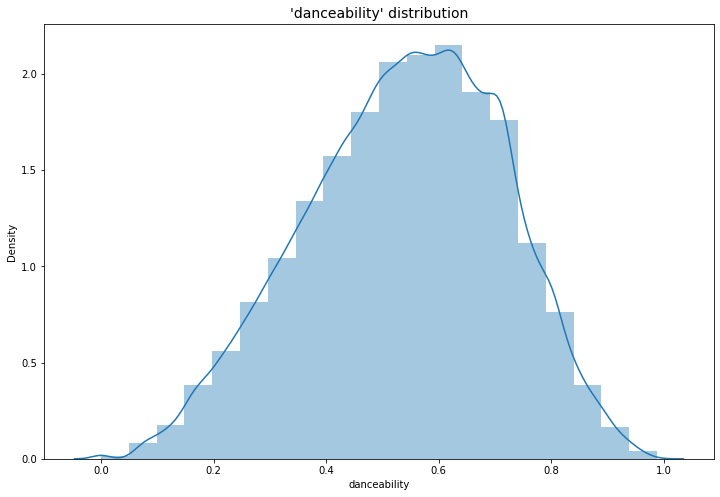

In [6]:
plt.figure(figsize=(12, 8))
sns.distplot(df['danceability'], kde=True, bins=20, norm_hist=True)
plt.title("'danceability' distribution", size=14)
plt.show()

In the first lab, we estimated the *danceability* distribution by an **exponpow** distribution. We take the parameters estimated by the MLE method and generate a sample using the inverse CDF method.

In [7]:
ml_estimates = (2.5917524604655537, -0.011026157636226535, 0.7211946443806283)  # from lab 1
sample = [stats.exponpow.ppf(np.random.rand(), *ml_estimates) for _ in range(10_000)]

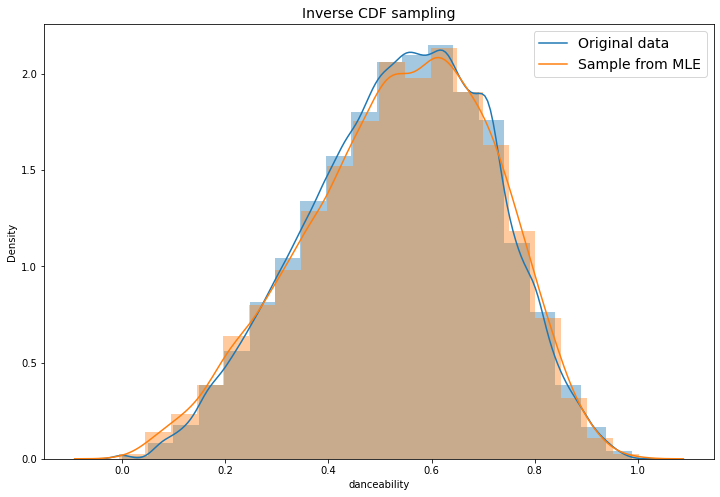

In [8]:
plt.figure(figsize=(12, 8))
sns.distplot(df['danceability'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Inverse CDF sampling", size=14)
plt.legend(["Original data", "Sample from MLE"], prop={"size": 14})
plt.show()

### Rejection  sampling method
Now let's try to generate a sample using the rejection  sampling method. We take the uniform distribution as a majorant.

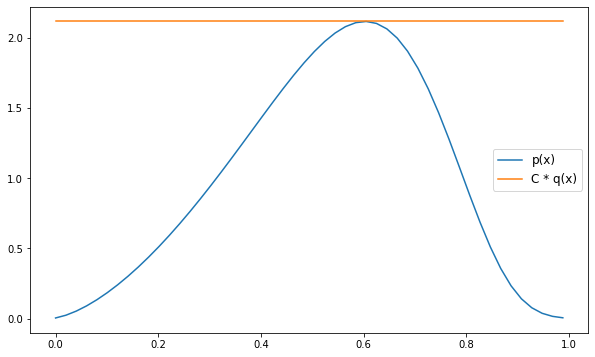

In [9]:
a, b = df['danceability'].min(), df['danceability'].max()

def p(x):
  return stats.exponpow.pdf(x, *ml_estimates)

def q(x):
  return stats.uniform.pdf(x, a, b - a)

xs = np.linspace(a, b)
k = max(p(xs) / q(xs))

def rejection_sampling(size):
    sample = []
    while len(sample) < size:
        z = np.random.uniform(a, b)
        u = np.random.uniform(0, k * q(z))
        if u <= p(z):
            sample.append(z)
    return np.array(sample)

plt.figure(figsize=(10, 6))
plt.plot(xs, p(xs))
plt.plot(xs, k * q(xs))
plt.legend(["p(x)", "C * q(x)"], prop={"size": 12})
plt.show()

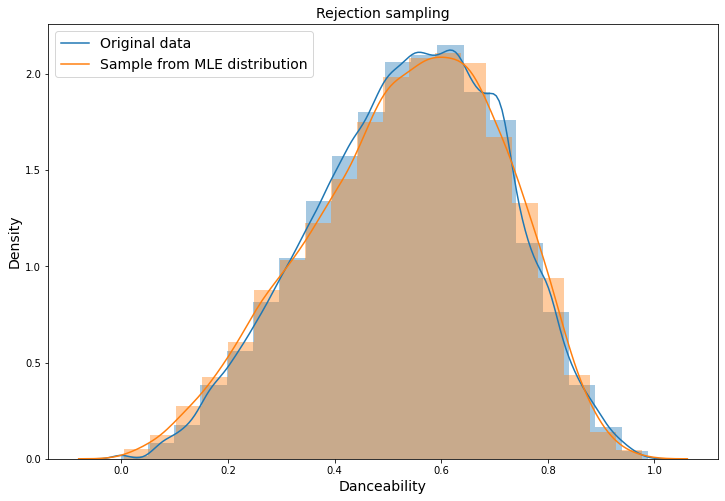

In [10]:
sample = rejection_sampling(10_000)

plt.figure(figsize=(12, 8))
sns.distplot(df['danceability'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Rejection sampling", size=14)
plt.xlabel("Danceability", size=14)
plt.ylabel("Density", size=14)
plt.legend(["Original data", "Sample from MLE distribution"], prop={"size": 14})
plt.show()

## Loudness

### Inverse sampling

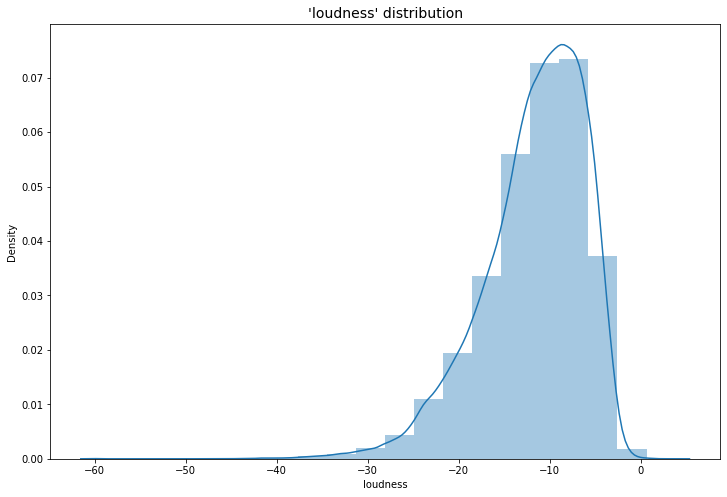

In [11]:
plt.figure(figsize=(12, 8))
sns.distplot(df['loudness'], kde=True, bins=20, norm_hist=True)
plt.title("'loudness' distribution", size=14)
plt.show()

In [12]:
ml_estimates = (-5.583874799847894, -4.541552390857278, 9.185209082565974)  # from lab 1
sample = [stats.skewnorm.ppf(np.random.rand(), *ml_estimates) for _ in range(10_000)]

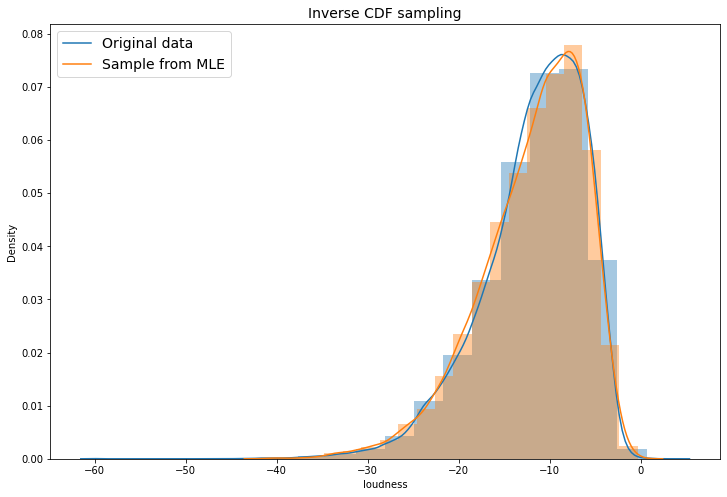

In [13]:
plt.figure(figsize=(12, 8))
sns.distplot(df['loudness'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Inverse CDF sampling", size=14)
plt.legend(["Original data", "Sample from MLE"], prop={"size": 14})
plt.show()

### Rejection  sampling method
Now let's try to generate a sample using the rejection  sampling method. We take the uniform distribution as a majorant.

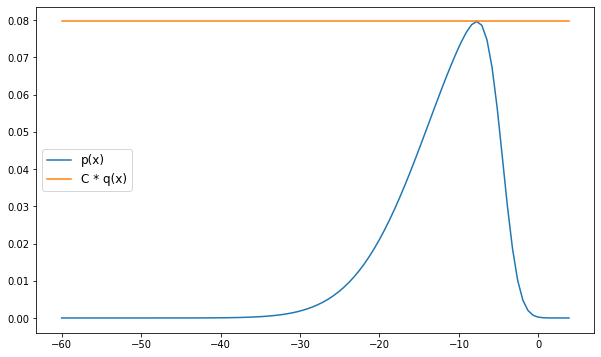

In [14]:
a, b = df['loudness'].min(), df['loudness'].max()

def p(x):
  return stats.skewnorm.pdf(x, *ml_estimates)

def q(x):
  return stats.uniform.pdf(x, a, b - a)

xs = np.linspace(a, b, 100)
k = max(p(xs) / q(xs))

def rejection_sampling(size):
    sample = []
    while len(sample) < size:
        z = np.random.uniform(a, b)
        u = np.random.uniform(0, k * q(z))
        if u <= p(z):
            sample.append(z)
    return np.array(sample)

plt.figure(figsize=(10, 6))
plt.plot(xs, p(xs))
plt.plot(xs, k * q(xs))
plt.legend(["p(x)", "C * q(x)"], prop={"size": 12})
plt.show()

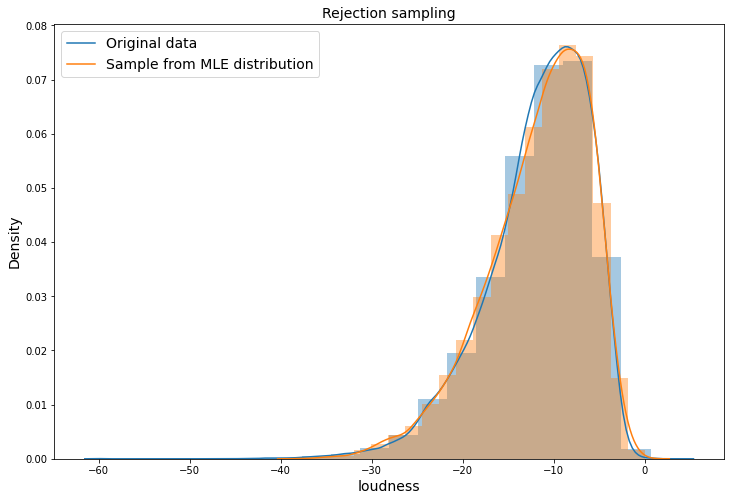

In [15]:
sample = rejection_sampling(10_000)

plt.figure(figsize=(12, 8))
sns.distplot(df['loudness'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Rejection sampling", size=14)
plt.xlabel("loudness", size=14)
plt.ylabel("Density", size=14)
plt.legend(["Original data", "Sample from MLE distribution"], prop={"size": 14})
plt.show()

## Duration_ms

### Inverse sampling

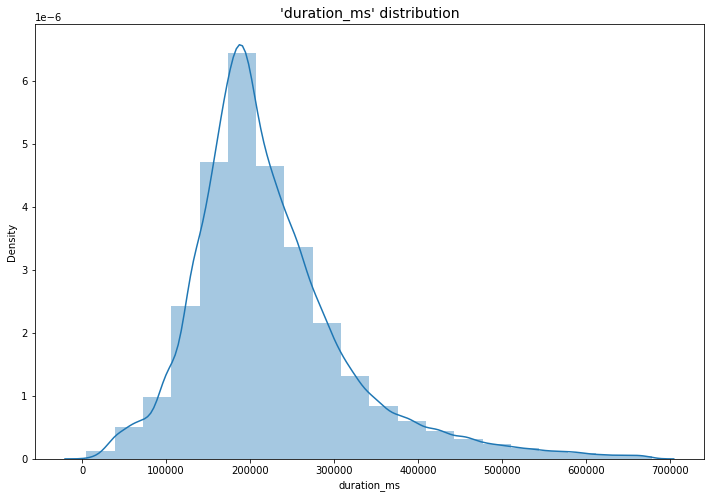

In [16]:
plt.figure(figsize=(12, 8))
sns.distplot(df['duration_ms'], kde=True, bins=20, norm_hist=True)
plt.title("'duration_ms' distribution", size=14)
plt.show()

In [17]:
ml_estimates = (1.7043460795438778, 144040.20144266787, 46792.60311409968)  # from lab 1
sample = [stats.exponnorm.ppf(np.random.rand(), *ml_estimates) for _ in range(10_000)]

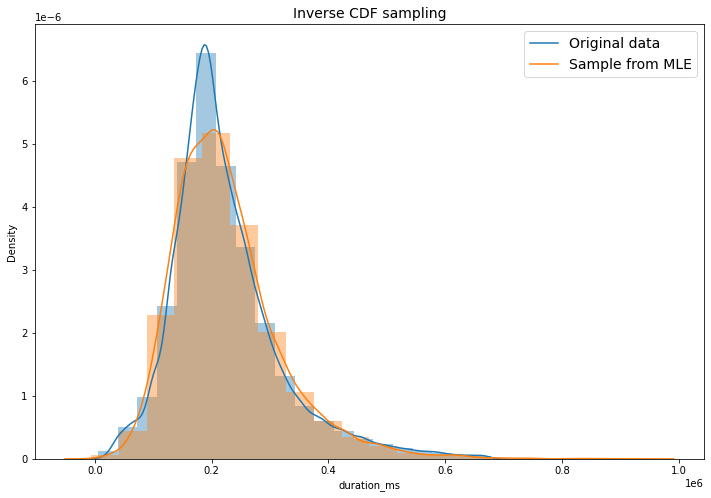

In [18]:
plt.figure(figsize=(12, 8))
sns.distplot(df['duration_ms'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Inverse CDF sampling", size=14)
plt.legend(["Original data", "Sample from MLE"], prop={"size": 14})
plt.show()

### Rejection  sampling method
Now let's try to generate a sample using the rejection  sampling method. We take the uniform distribution as a majorant.

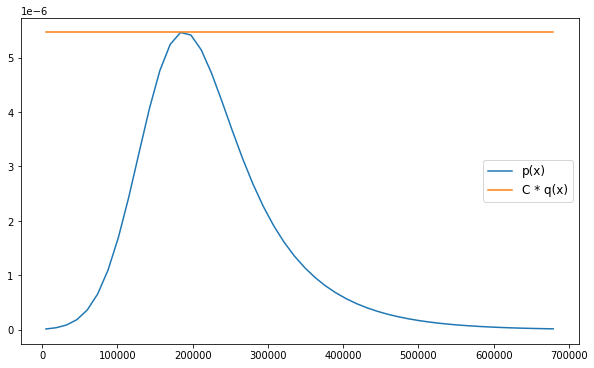

In [19]:
a, b = df['duration_ms'].min(), df['duration_ms'].max()

def p(x):
  return stats.exponnorm.pdf(x, *ml_estimates)

def q(x):
  return stats.uniform.pdf(x, a, b - a)

xs = np.linspace(a, b)
k = max(p(xs) / q(xs))

def rejection_sampling(size):
    sample = []
    while len(sample) < size:
        z = np.random.uniform(a, b)
        u = np.random.uniform(0, k * q(z))
        if u <= p(z):
            sample.append(z)
    return np.array(sample)

plt.figure(figsize=(10, 6))
plt.plot(xs, p(xs))
plt.plot(xs, k * q(xs))
plt.legend(["p(x)", "C * q(x)"], prop={"size": 12})
plt.show()

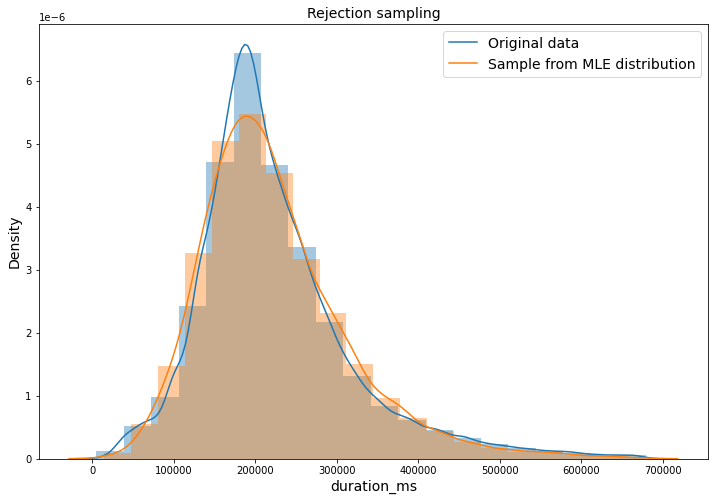

In [20]:
sample = rejection_sampling(10_000)

plt.figure(figsize=(12, 8))
sns.distplot(df['duration_ms'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Rejection sampling", size=14)
plt.xlabel("duration_ms", size=14)
plt.ylabel("Density", size=14)
plt.legend(["Original data", "Sample from MLE distribution"], prop={"size": 14})
plt.show()

# Correlation

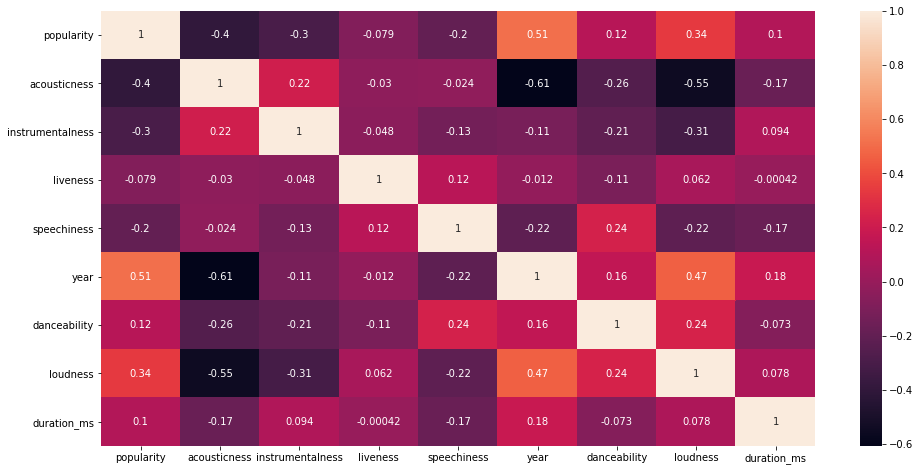

In [21]:
correlation_mat = df[predictors + targets].corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [22]:
data = df[predictors + targets]

rho = data.corr()
pval = data.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)

In [23]:
pval

,popularity,acousticness,instrumentalness,liveness,speechiness,year,danceability,loudness,duration_ms
popularity,0.000000e+00,0.000000e+00,0.000000e+00,4.094647e-236,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
acousticness,0.000000e+00,0.000000e+00,0.000000e+00,1.299104e-35,1.132197e-22,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
instrumentalness,0.000000e+00,0.000000e+00,0.000000e+00,2.854719e-89,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
liveness,4.094647e-236,1.299104e-35,2.854719e-89,0.000000e+00,0.000000e+00,0.000002,0.000000e+00,1.172918e-148,8.628695e-01
speechiness,0.000000e+00,1.132197e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
year,0.000000e+00,0.000000e+00,0.000000e+00,1.587834e-06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
danceability,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.554331e-200
loudness,0.000000e+00,0.000000e+00,0.000000e+00,1.172918e-148,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.738218e-229
duration_ms,0.000000e+00,0.000000e+00,0.000000e+00,8.628695e-01,0.000000e+00,0.000000,2.554331e-200,1.738218e-229,0.000000e+00


# Bayesian network

In [ ]:
!pip install pgmpy

In [58]:
def sampling (bn: DAG, data: pd.DataFrame, n: int = 100):
  bn_new = BayesianModel(bn.edges())
  bn_new.fit(data)
  sampler = BayesianModelSampling(bn_new)
  sample = sampler.forward_sample(size=n, return_type='dataframe')
  return sample

In [44]:
data_t = data.copy()
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(data_t)
data_t[data_t.columns] = data_discrete

## Hand-crafted networks

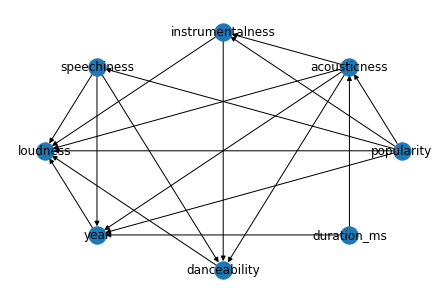

In [67]:
from pgmpy.models import BayesianModel
import networkx as nx

cancer_model = BayesianModel([
         ('popularity', 'acousticness'),
         ('popularity', 'instrumentalness'),
         ('popularity', 'speechiness'),       
         ('popularity', 'loudness'),    
         ('popularity', 'year'),               
         ('acousticness', 'instrumentalness'),               
         ('acousticness', 'year'),                                   
         ('acousticness', 'danceability'),    
         ('acousticness', 'loudness'),
         ('instrumentalness', 'danceability'), 
         ('instrumentalness', 'loudness'), 
         ('speechiness', 'year'), 
         ('speechiness', 'danceability'), 
         ('speechiness', 'loudness'), 
         ('year', 'loudness'), 
         ('danceability', 'loudness'),
         ('duration_ms', 'acousticness'),
         ('duration_ms', 'year'),
])
cancer_model

G_K2 = nx.DiGraph()
G_K2.add_edges_from(cancer_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True)

In [78]:
sample = sampling(cancer_model, data_t, 10000)

Generating for node: loudness: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]


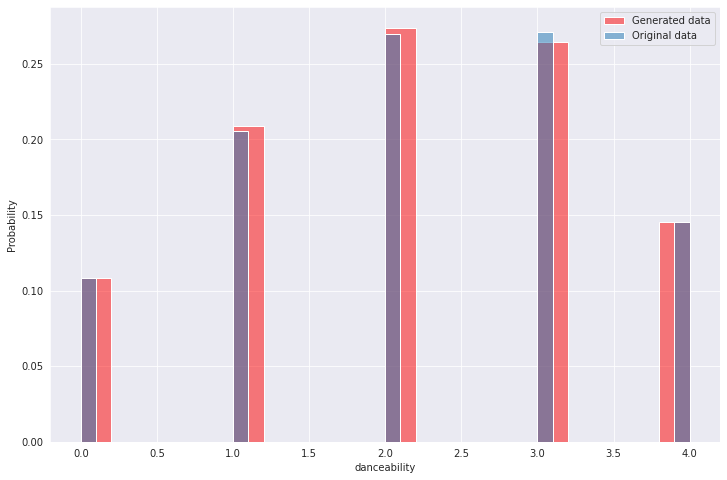

In [112]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.danceability, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.danceability, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

## Hill Climb Search

In [53]:
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.estimators import (
    BDeuScore,
    BicScore,
    HillClimbSearch,
    K2Score,
    TreeSearch,
)
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG

  0%|          | 28/1000000 [00:09<92:04:58,  3.02it/s]


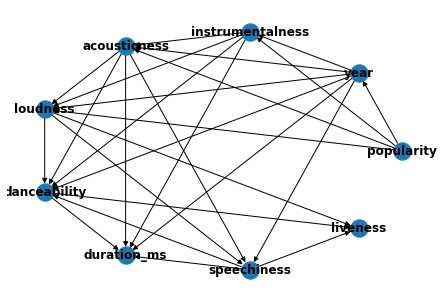

In [45]:
hc = HillClimbSearch(data_t, scoring_method=K2Score(data_t))

best_model = hc.estimate()

G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [114]:
sample = sampling(best_model, data_t, 10000)

Generating for node: liveness: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]


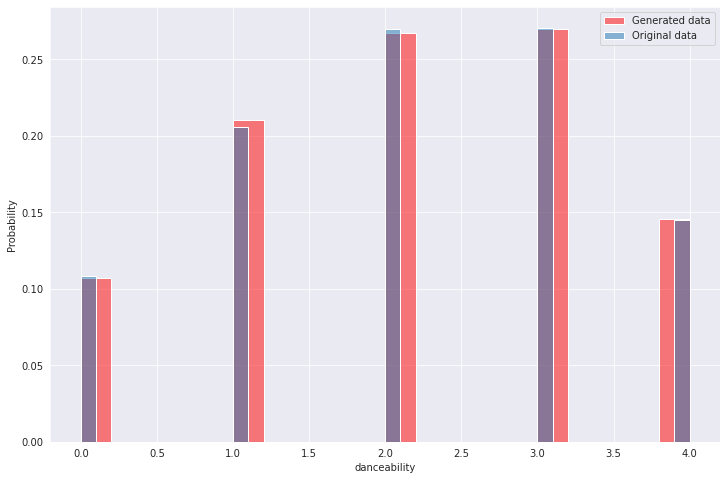

In [115]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.danceability, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.danceability, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

## Tree search

Building tree: 100%|██████████| 36/36.0 [00:00<00:00, 41.15it/s]


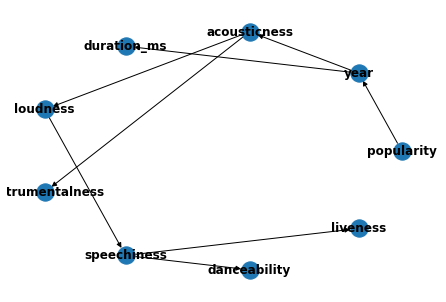

In [60]:
tree_search = TreeSearch(data_t, root_node='popularity')

best_model_tree = tree_search.estimate()

G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model_tree.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [116]:
sample = sampling(best_model_tree, data_t, 10000)

Generating for node: danceability: 100%|██████████| 9/9 [00:00<00:00, 24.19it/s]


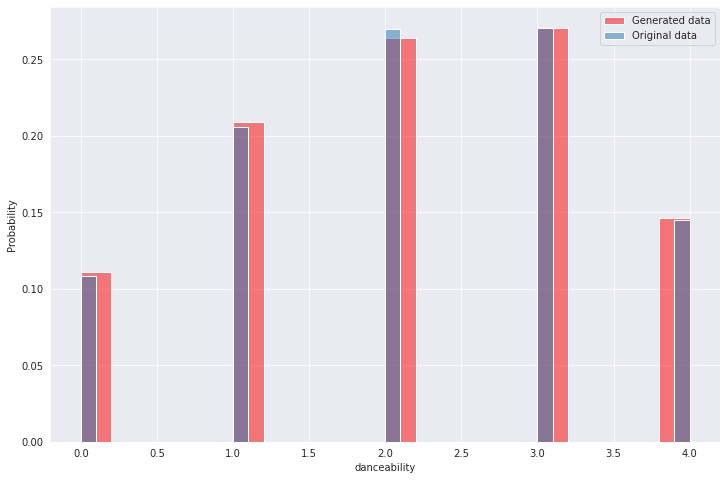

In [117]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.danceability, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.danceability, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()